In [1]:
!pip install -q mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [2]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import mediapipe as mp
import matplotlib.pyplot as plt

In [3]:
# Mount GDrive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
# Put Colab in the context of this challenge
import os

# os.chdir allows you to change directories, like cd in the Terminal
os.chdir('/content/drive/MyDrive/Colab_Notebooks/lewg_final_project/signsense')

In [5]:
test_data_path = '/content/drive/MyDrive/Colab_Notebooks/lewg_final_project/signsense/raw_data/sign_asl/asl_alphabet_test/asl_alphabet_test'
files = os.listdir(test_data_path)
path = os.path.join(test_data_path, files[1])
image = Image.open(path)
# image = image.resize((50, 50))
# plt.imshow(image)

In [6]:
# Function to detect hand landmarks and draw them on the image
def visualize_hand_landmarks(image):
    mp_hands = mp.solutions.hands
    mp_drawing = mp.solutions.drawing_utils

    # Initialize MediaPipe Hands model
    hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1)

    # Convert the image to RGB format
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect hand landmarks
    results = hands.process(image_rgb)
    # print(results.multi_hand_landmarks)

    # If landmarks are detected, draw them on the image
    if results.multi_hand_landmarks is not None:
      for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

      return image
    else:
      return None





In [8]:
test_data_path = '/content/drive/MyDrive/Colab_Notebooks/lewg_final_project/signsense/raw_data/sign_asl/asl_alphabet_test/asl_alphabet_test'
files = os.listdir(test_data_path)
path = os.path.join(test_data_path, files[5])
path

'/content/drive/MyDrive/Colab_Notebooks/lewg_final_project/signsense/raw_data/sign_asl/asl_alphabet_test/asl_alphabet_test/W_test.jpg'

array([[[252,   4,   0],
        [253,   7,   0],
        [242,   1,   0],
        ...,
        [242,   1,   9],
        [240,   0,   0],
        [250,   5,   1]],

       [[254,   6,   0],
        [234,   3,   0],
        [209,  10,   8],
        ...,
        [187,   3,  11],
        [214,   7,   9],
        [219,   2,   0]],

       [[247,   0,   0],
        [210,   6,   5],
        [200,  87,  84],
        ...,
        [150,  75,  83],
        [198,  64,  70],
        [173,  12,  14]],

       ...,

       [[247,   0,   4],
        [199,   7,   8],
        [104,  17,  15],
        ...,
        [111,  99, 105],
        [184,  97, 100],
        [134,  10,  10]],

       [[250,   2,   1],
        [216,   5,   1],
        [148,   8,   7],
        ...,
        [183,  93,  98],
        [222,  87,  85],
        [171,  15,  10]],

       [[248,   2,   0],
        [224,   5,   1],
        [176,  11,   8],
        ...,
        [141,  14,  16],
        [171,  11,   9],
        [185,  11,   5]]], dtype=uint8)
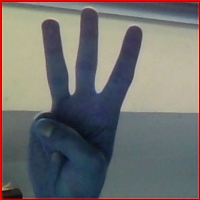

In [9]:
# Load the image
image_path = path
image = cv2.imread(image_path)

if image is None:
    print("Error: Unable to load the image.")
image

In [10]:
# Visualize hand landmarks on the image
annotated_image = visualize_hand_landmarks(image)

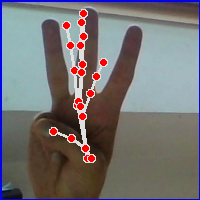

In [11]:
cv2_imshow(annotated_image)

In [11]:
import cv2
import mediapipe as mp
import numpy as np

# Function to detect hand landmarks and draw them without the imagex
def visualize_hand_landmarks_without_image(image):
    mp_hands = mp.solutions.hands
    mp_drawing = mp.solutions.drawing_utils

    # Initialize MediaPipe Hands model
    hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1)

    # Convert the image to RGB format
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect hand landmarks
    results = hands.process(image_rgb)
    # print("Detection results:", results.multi_hand_landmarks)

    blank_image = np.zeros_like(image)


    # If landmarks are detected, draw them on the blank canvas
    if results.multi_hand_landmarks:
      for hand_landmarks in results.multi_hand_landmarks:
        # Draw hand landmarks on the blank canvas
          mp_drawing.draw_landmarks(blank_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

      return blank_image
    else:
      return None



In [12]:
test_data_path = '/content/drive/MyDrive/Colab_Notebooks/lewg_final_project/signsense/raw_data/sign_asl/asl_alphabet_test/asl_alphabet_test'
files = os.listdir(test_data_path)
# files

In [12]:
len(files)

28

In [13]:
path=[]
for i in range(28):
  path_im = os.path.join(test_data_path, files[i])
  path.append(path_im)
# path

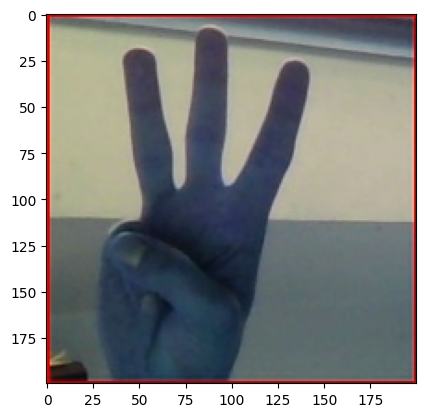

In [14]:
imageo = cv2.imread(path[5])
plt.imshow(imageo)

In [15]:
# Load the image
plt.figure(figsize=(20,30))
images=[]
for i in range(28):
  image = cv2.imread(path[i])
  plt.subplot(7,4,i+1)
  plt.imshow(image)
  images.append(image)

Output hidden; open in https://colab.research.google.com to view.

In [19]:
type(images[0])

numpy.ndarray

Image 0 : None
<class 'NoneType'>
Image 1 : [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
<class 'numpy.ndarray'>
Image 2 : [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
<class 'numpy.ndarray'>
Image 3 : [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0

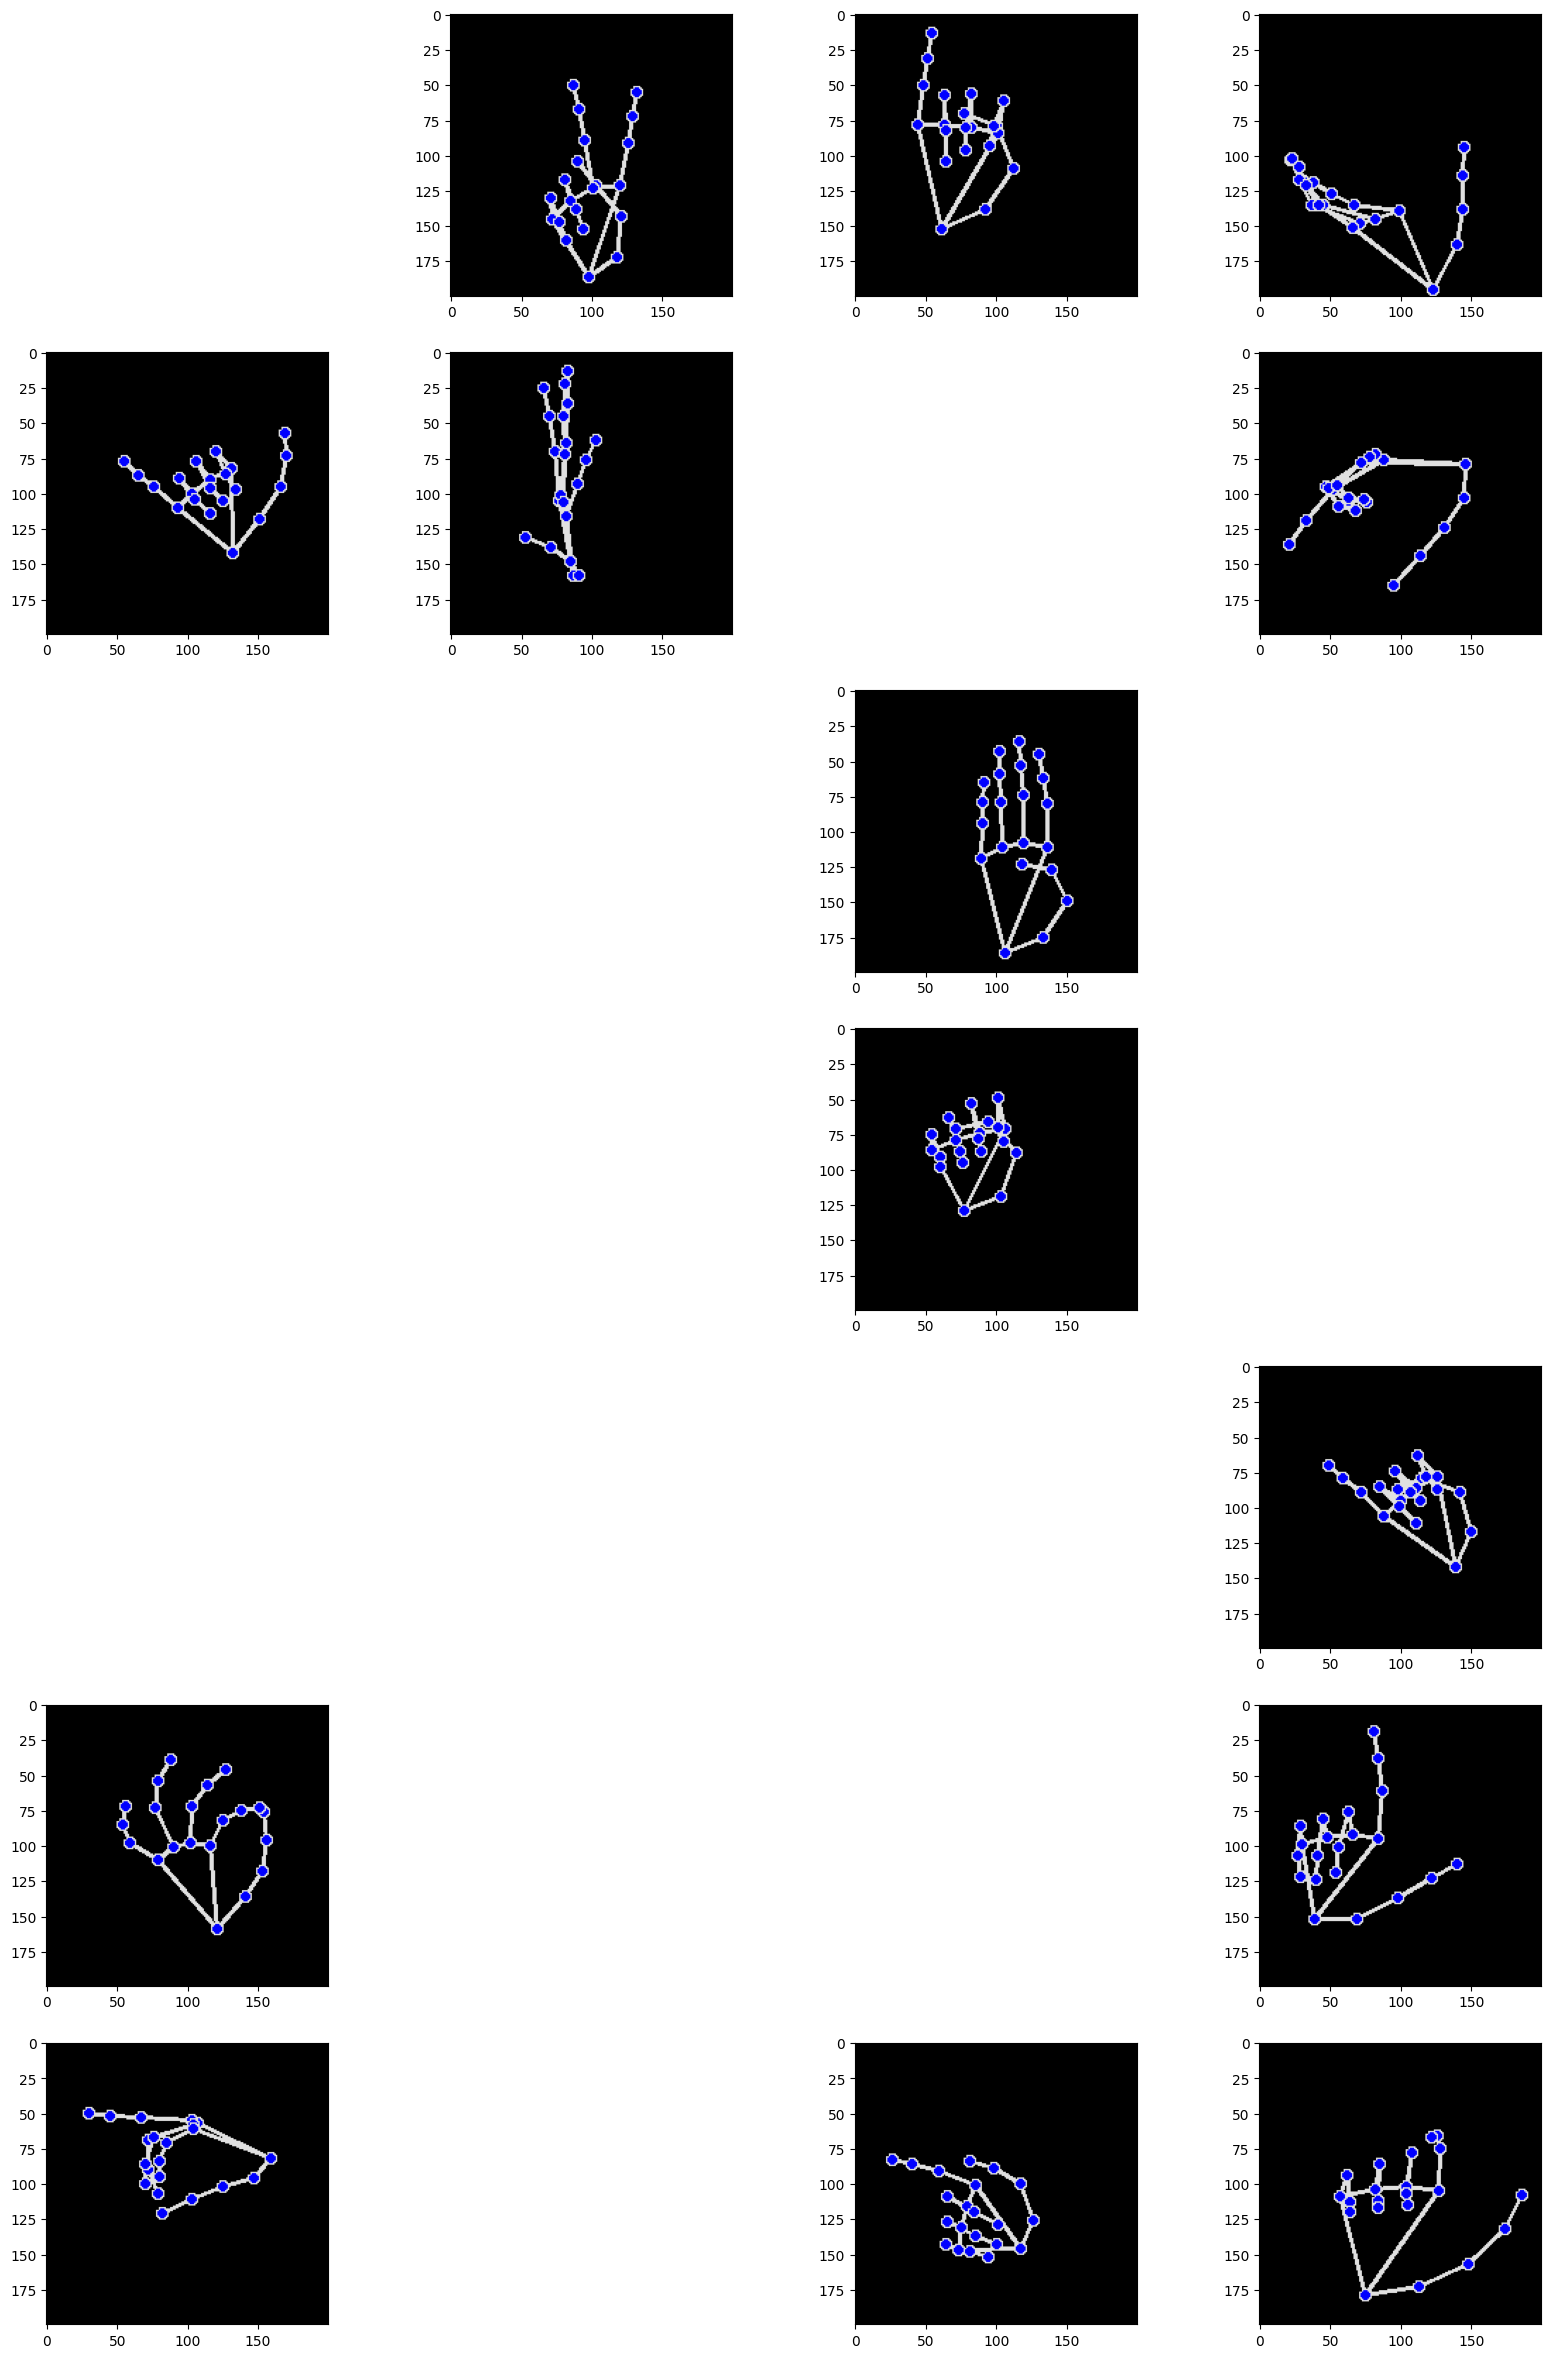

In [16]:
plt.figure(figsize=(20,30))
for i in range(28):
  balnk_image = visualize_hand_landmarks_without_image(images[i])
  print("Image", i, ":", balnk_image)
  result_type = type(balnk_image)
  print(result_type)
  if balnk_image is not None:
        plt.subplot(7, 4, i + 1)
        plt.imshow(balnk_image)
# plt.show()

Image 0 : None
<class 'NoneType'>
Image 1 : [[[252   3   0]
  [255   9   0]
  [240   0   0]
  ...
  [247   0  11]
  [247   0   2]
  [251   1   0]]

 [[253   4   0]
  [235   3   0]
  [207   8   6]
  ...
  [194   0  16]
  [219   7  13]
  [222   1   3]]

 [[251   0   7]
  [211   5  10]
  [191  77  77]
  ...
  [137  57  74]
  [187  49  60]
  [175  10  17]]

 ...

 [[245   0   4]
  [195   5   6]
  [ 97  17  16]
  ...
  [122 110 116]
  [195 108 111]
  [136  13  11]]

 [[247   4   2]
  [212   5   3]
  [144  11   8]
  ...
  [194 105 108]
  [231  98  95]
  [168  15   8]]

 [[244   2   0]
  [219   4   1]
  [174  12  10]
  ...
  [142  15  14]
  [168  12   7]
  [182  13   5]]]
<class 'numpy.ndarray'>
Image 2 : [[[252   2   0]
  [251   5   0]
  [240   0   0]
  ...
  [250   0   9]
  [251   0   1]
  [253   3   0]]

 [[255   5   0]
  [232   0   0]
  [207  10   8]
  ...
  [193   0  11]
  [222   9  12]
  [222   0   0]]

 [[244   0   2]
  [210   7  10]
  [202  86  85]
  ...
  [143  64  77]
  [194  58  64

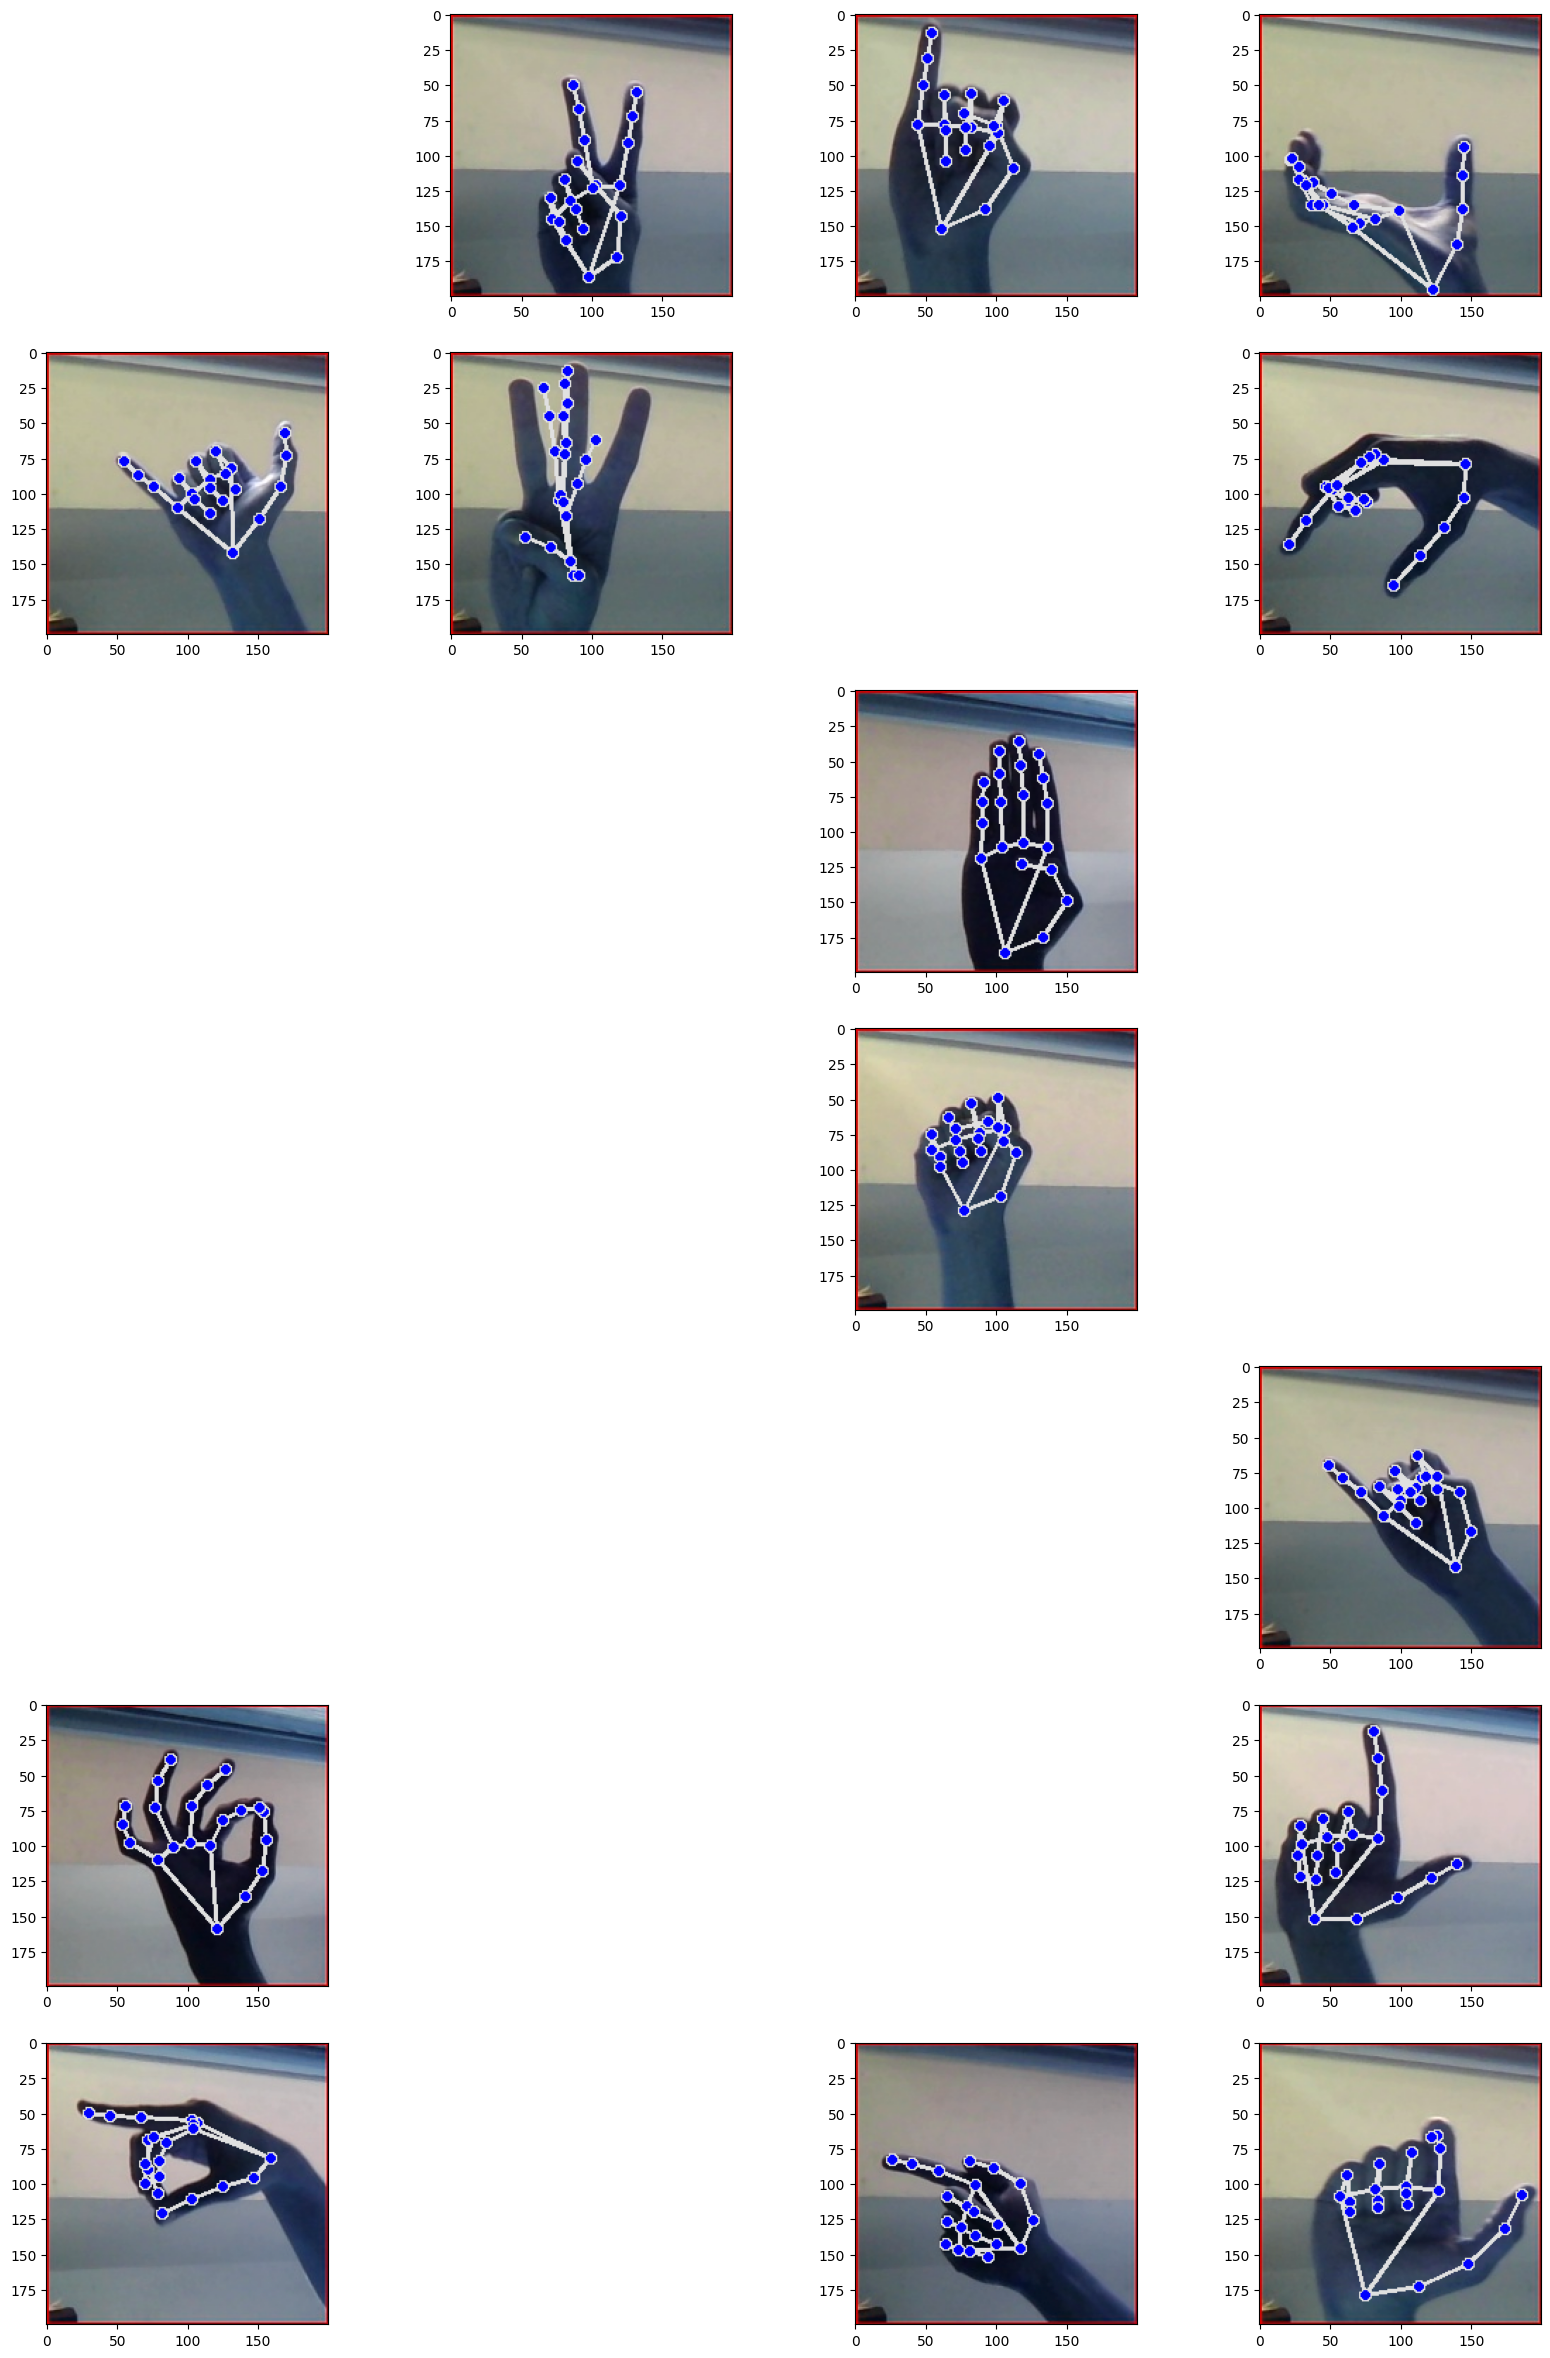

In [17]:
plt.figure(figsize=(20,30))
for i in range(28):
  balnk_image = visualize_hand_landmarks(images[i])
  print("Image", i, ":", balnk_image)
  result_type = type(balnk_image)
  print(result_type)
  if balnk_image is not None:
        plt.subplot(7, 4, i + 1)
        plt.imshow(balnk_image)
plt.show()

In [19]:
imageo = cv2.imread(path[5])
#
# plt.imshow(imageo)

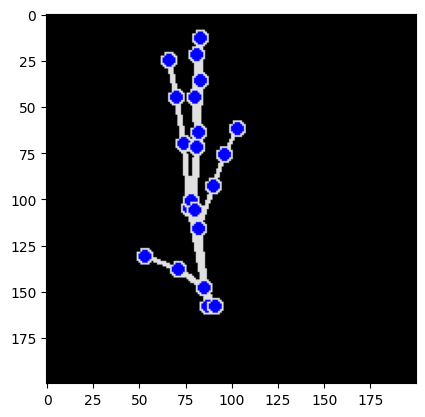

In [20]:
balnk_imageo = visualize_hand_landmarks_without_image(imageo)

plt.imshow(balnk_imageo)

In [21]:
path1='/content/drive/MyDrive/Colab_Notebooks/lewg_final_project/signsense/raw_data/sign_asl/asl_alphabet_test/W97.jpg'

In [22]:
path2 = '/content/drive/MyDrive/Colab_Notebooks/lewg_final_project/signsense/raw_data/sign_asl/asl_alphabet_test/O34.jpg'

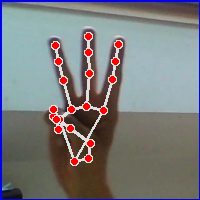

In [23]:
image = cv2.imread(path1)
# plt.imshow(image)
annotated_image = visualize_hand_landmarks(image)
cv2_imshow(annotated_image)

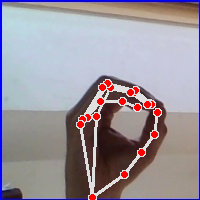

In [24]:
image = cv2.imread(path2)
# plt.imshow(image)
annotated_image = visualize_hand_landmarks(image)
cv2_imshow(annotated_image)

In [23]:
# Load the image
plt.figure(figsize=(20,30))
images=[]
for i in range(28):
  image = cv2.imread(path[i])
  # plt.subplot(7,4,i+1)
  # plt.imshow(image)
  images.append(image)

<Figure size 2000x3000 with 0 Axes>

Image 0 : None
<class 'NoneType'>
Image 1 : [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
<class 'numpy.ndarray'>
Image 2 : [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
<class 'numpy.ndarray'>
Image 3 : [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0

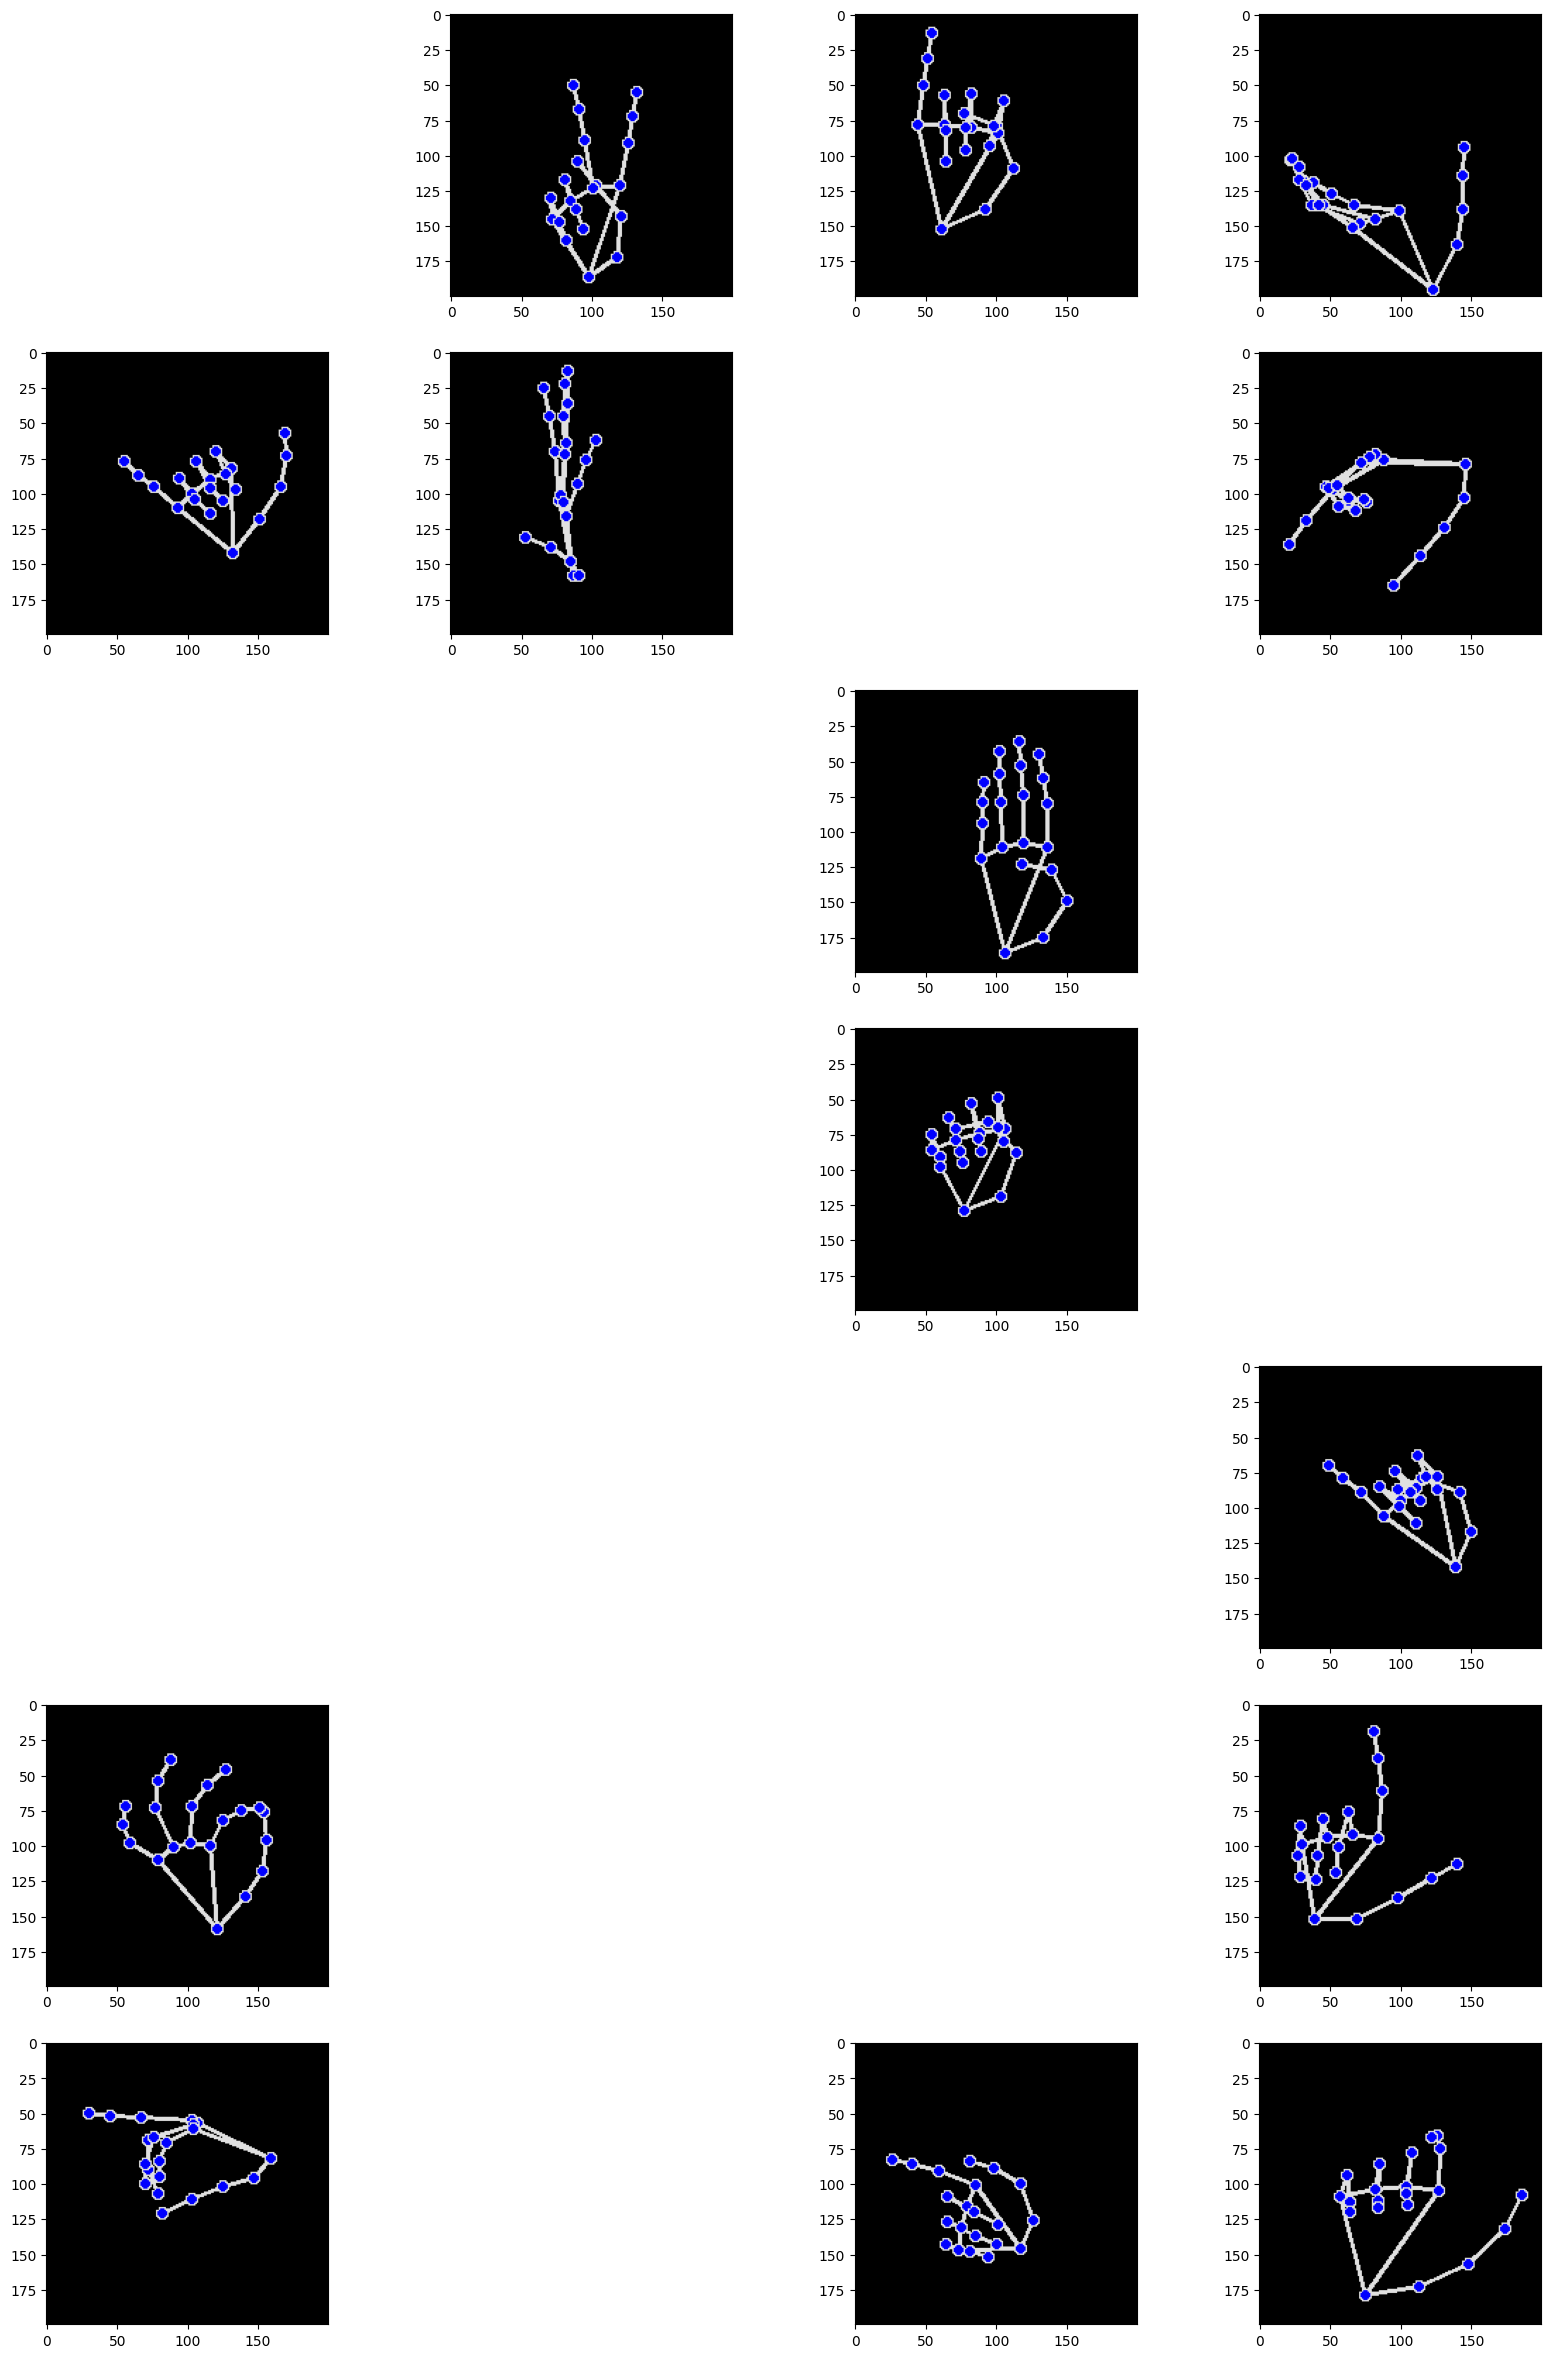

In [24]:
plt.figure(figsize=(20,30))
image_data= []
for i in range(28):
  balnk_image = visualize_hand_landmarks_without_image(images[i])
  image_data.append(balnk_image)
  print("Image", i, ":", balnk_image)
  result_type = type(balnk_image)
  print(result_type)
  if balnk_image is not None:
        plt.subplot(7, 4, i + 1)
        plt.imshow(balnk_image)
# plt.show()

In [25]:
image_data= []
for i in range(28):
  balnk_image = visualize_hand_landmarks_without_image(images[i])
  if balnk_image is not None:
    image_data.append(balnk_image)
image_data


[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [27]:
X_train = np.stack(image_data)

In [29]:
X_train.shape

(14, 200, 200, 3)

In [34]:
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import numpy as np
import os
from PIL import Image
from tensorflow.keras import Sequential, layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import layers, optimizers, callbacks
from PIL import Image
import requests
from io import BytesIO
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.applications.vgg16 import preprocess_input

In [32]:
labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13]
y = to_categorical(labels, 14)

In [33]:
y

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]],
      dtype=float32)

In [39]:
def dummy_model():
  input_shape= X_train[0].shape
  model = Sequential()

  model.add(layers.Rescaling(1./255, input_shape = input_shape))
  model.add(layers.Conv2D(filters = 32, kernel_size = (5,5), activation="relu", padding = "same"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )


  model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation="relu", padding = "same"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )


  model.add(layers.Conv2D(filters = 128, kernel_size = (3,3), activation="relu", padding = "same"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )

  model.add(layers.Flatten())

  # Here we flatten our data

  model.add(layers.Dense(128, activation="relu"))
  model.add(layers.Dropout(0.2))

  model.add(layers.Dense(64, activation="relu"))
  model.add(layers.Dropout(0.2))


# prediction layer
  model.add(layers.Dense(14, activation="softmax"))

# compiling model
  adam = optimizers.Adam(learning_rate = 0.001)
  model.compile(loss='categorical_crossentropy',
                optimizer= adam,
                metrics=['accuracy'])


  return model

In [40]:
dummy_model= dummy_model()
dummy_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 200, 200, 32)      2432      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 100, 100, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 50, 50, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 128)      

In [41]:
MODEL = "dummy_model_size100"

modelCheckpooint = callbacks.ModelCheckpoint("{}.h5".format(MODEL), monitor="val_loss", verbose=0, save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss", factor = 0.1, patience=3, verbose=1, min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, restore_best_weights=True)


In [43]:
%%time
history = dummy_model.fit(X_train, y,
        epochs=20,
        validation_split= 0.1,
        callbacks = [modelCheckpooint, LRreducer, EarlyStopper])


Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.7673 - accuracy: 0.7500 - val_loss: 7.0180 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/20
1/1 [==============================] - 1s 873ms/step - loss: 0.4298 - accuracy: 0.9167 - val_loss: 8.5904 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/20
1/1 [==============================] - 1s 798ms/step - loss: 0.5720 - accuracy: 0.7500 - val_loss: 9.3375 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/20
1/1 [==============================] - ETA: 0s - loss: 0.1000 - accuracy: 1.0000
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
1/1 [==============================] - 1s 818ms/step - loss: 0.1000 - accuracy: 1.0000 - val_loss: 10.2013 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 5/20
1/1 [==============================] - 1s 815ms/step - loss: 0.2690 - accuracy: 0.8333 - val_loss: 10.2540 - val_accuracy: 0.0000e+00 - lr: 1.0000e-04
Epoch 6/20
1/1 [==============================] - 1s 7